### sequential编程

In [1]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input
seq_model = Sequential() 
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


In [2]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


### 函数式编程

In [3]:
input_tensor = Input(shape=(64,)) 
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = Model(input_tensor, output_tensor) 
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 都是随机数据，所以损失很多
model.compile(optimizer='rmsprop', loss='categorical_crossentropy') 
import numpy as np 
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))
model.fit(x_train, y_train, epochs=10, batch_size=128) 
score = model.evaluate(x_train, y_train)


Epoch 1/10
1000/1000 [==============================] - 0s 135us/step - loss: 11.7126
Epoch 2/10
1000/1000 [==============================] - 0s 35us/step - loss: 12.5325
Epoch 3/10
1000/1000 [==============================] - 0s 25us/step - loss: 13.7788
Epoch 4/10
1000/1000 [==============================] - 0s 25us/step - loss: 15.6393
Epoch 5/10
1000/1000 [==============================] - 0s 30us/step - loss: 18.6873
Epoch 6/10
1000/1000 [==============================] - 0s 30us/step - loss: 22.5393
Epoch 7/10
1000/1000 [==============================] - 0s 25us/step - loss: 27.3306
Epoch 8/10
1000/1000 [==============================] - 0s 30us/step - loss: 32.4983
Epoch 9/10
1000/1000 [==============================] - 0s 30us/step - loss: 38.0227
Epoch 10/10
1000/1000 [==============================] - 0s 55us/step


### 多输入

In [4]:
from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,)
                   , dtype='int32'
                   , name='text') 
embedded_text = layers.Embedding(text_vocabulary_size,64)(text_input) 
encoded_text = layers.LSTM(32)(embedded_text) 

question_input = Input(shape=(None,)
                       ,dtype='int32'
                       ,name='question') 
embedded_question = layers.Embedding(question_vocabulary_size,32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question],axis=-1) 
answer = layers.Dense(answer_vocabulary_size,activation='softmax')(concatenated)
model = Model([text_input, question_input], answer) 
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy'
              ,metrics=['acc'])

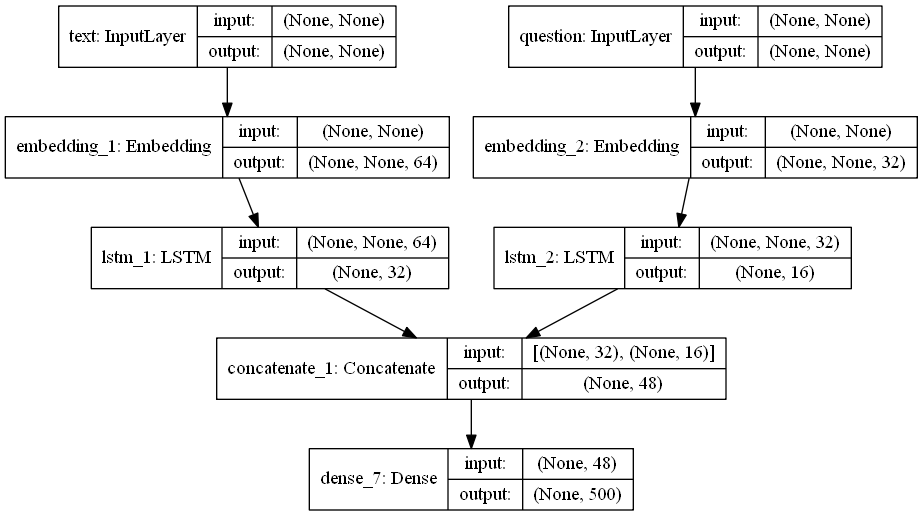

In [5]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model,show_shapes=True,to_file='Multi-input.png')
Image(filename='Multi-input.png')

In [7]:
import numpy as np
import keras
num_samples = 1000
max_length = 100
text = np.random.randint(1, text_vocabulary_size,size=(num_samples, max_length)) 
question = np.random.randint(1, question_vocabulary_size,size=(num_samples, max_length))
answers = np.random.randint(answer_vocabulary_size, size=(num_samples))
answers = keras.utils.to_categorical(answers, answer_vocabulary_size)
model.fit([text, question], answers, epochs=10, batch_size=128) 
model.fit({'text': text, 'question': question}, answers,epochs=10, batch_size=128)


Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 6.2144 - acc: 0.0040
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.1968 - acc: 0.0540
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.1397 - acc: 0.0060
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 6.0580 - acc: 0.0020
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.9897 - acc: 0.0070
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.9092 - acc: 0.0100
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.8326 - acc: 0.0170
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.7599 - acc: 0.0180
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.6910 - acc: 0.0240
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.6088 - acc: 0.0280
Epoch 1/10
1000/1000 [======

### 多输出

In [28]:
from keras import layers
from keras import Input
from keras.models import Model

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(vocabulary_size,256)(posts_input)  # 50000*256=12800000
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x) 
income_prediction = layers.Dense(num_income_groups
                                 ,activation='softmax'
                                 ,name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)
model = Model(posts_input,[age_prediction, income_prediction, gender_prediction])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, None, 256)    12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, None, 128)    163968      embedding_5[0][0]                
__________________________________________________________________________________________________
max_pooling1d_5 (MaxPooling1D)  (None, None, 128)    0           conv1d_11[0][0]                  
____________________________________________________________________________________________

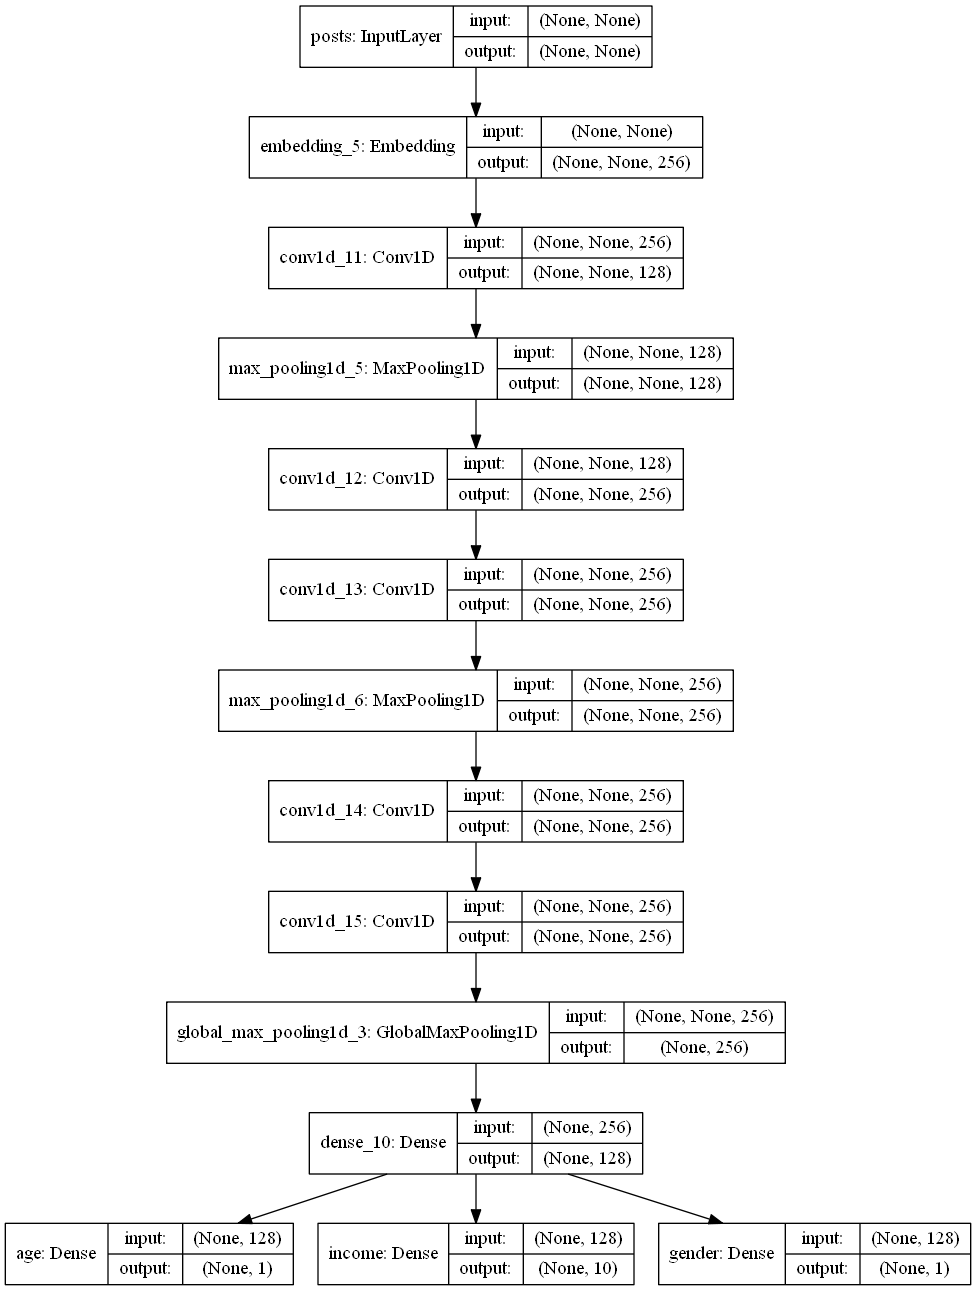

In [29]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model,show_shapes=True,to_file='Multi-output.png')
Image(filename='Multi-output.png')

In [21]:
# model.compile(optimizer='rmsprop'
#               ,loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])
# model.compile(optimizer='rmsprop'
#               ,loss={'age': 'mse'
#                      ,'income': 'categorical_crossentropy'
#                      , 'gender': 'binary_crossentropy'})

多个输出，多个损失函数，各个损失函数的比例

In [30]:
model.compile(optimizer='rmsprop'
              ,loss=['mse', 'sparse_categorical_crossentropy', 'binary_crossentropy']
              ,loss_weights=[0.25, 1., 10.])
model.compile(optimizer='rmsprop'
              , loss={'age': 'mse'
                      ,'income': 'sparse_categorical_crossentropy'
                      ,'gender': 'binary_crossentropy'}
              , loss_weights={'age': 0.25
                             ,'income': 1.
                            ,'gender': 10.})

数据

In [31]:
import numpy as np

vocabulary_size = 50000
num_income_groups = 10  # 收入类别
 
num_samples = 1000  # 样本数
max_length = 300 # 文章长度

posts = np.random.randint(0,vocabulary_size
                          ,size=(num_samples,max_length)) 

age_targets = np.random.random(num_samples)*80+10
income_targets = np.random.randint(0,num_income_groups,num_samples)  # 没有做one-hot
gender_targets = np.random.randint(0,2,num_samples)

训练

In [32]:
model.fit(posts,[age_targets,income_targets,gender_targets]
         ,epochs=10
         ,batch_size=64)

# model.fit(posts,{'age':age_targets
#                  ,'incom':income_targets
#                  ,'gender':gender_targets}
#          ,epochs=10
#          ,batch_size=64)

Epoch 1/10
1000/1000 [==============================] - 14s 14ms/step - loss: 383.4281 - age_loss: 1453.0640 - income_loss: 3.4463 - gender_loss: 1.2916
Epoch 2/10
1000/1000 [==============================] - 14s 14ms/step - loss: 172.0945 - age_loss: 625.7538 - income_loss: 2.4350 - gender_loss: 1.4459
Epoch 3/10
1000/1000 [==============================] - 14s 14ms/step - loss: 131.1366 - age_loss: 466.0260 - income_loss: 2.4051 - gender_loss: 1.0391
Epoch 4/10
1000/1000 [==============================] - 14s 14ms/step - loss: 101.9030 - age_loss: 354.6036 - income_loss: 2.3982 - gender_loss: 0.9931
Epoch 5/10
1000/1000 [==============================] - 14s 14ms/step - loss: 94.4785 - age_loss: 337.3819 - income_loss: 2.4324 - gender_loss: 1.0248
Epoch 6/10
1000/1000 [==============================] - 14s 14ms/step - loss: 75.9624 - age_loss: 254.1864 - income_loss: 2.3779 - gender_loss: 0.9014
Epoch 7/10
1000/1000 [==============================] - 14s 14ms/step - loss: 78.5954 - a

### 有向无环图

#### 简洁InceptionV3 模型

In [7]:
from keras import layers
from keras import Input
from keras import Model

x = Input(shape=(32,32,3),name='input')
branch_a = layers.Conv2D(128, 1,activation='relu', strides=2,padding='same',name='branch_a')(x) 

branch_b = layers.Conv2D(128, 1, activation='relu',padding='same',name='branch_b1')(x) 
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2,padding='same',name='branch_b2')(branch_b)

branch_c = layers.AveragePooling2D(3, strides=2,padding='same',name='branch_c1')(x) 
branch_c = layers.Conv2D(128, 3, activation='relu',padding='same',name='branch_c2')(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu',padding='same',name='branch_d1')(x)
branch_d = layers.Conv2D(128, 3, activation='relu',padding='same',name='branch_d2')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2,padding='same',name='branch_d3')(branch_d)

output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1,name='output') # 所有的层拼接起来

model = Model(x,output)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
branch_d1 (Conv2D)              (None, 32, 32, 128)  512         input[0][0]                      
__________________________________________________________________________________________________
branch_b1 (Conv2D)              (None, 32, 32, 128)  512         input[0][0]                      
__________________________________________________________________________________________________
branch_c1 (AveragePooling2D)    (None, 16, 16, 3)    0           input[0][0]                      
____________________________________________________________________________________________

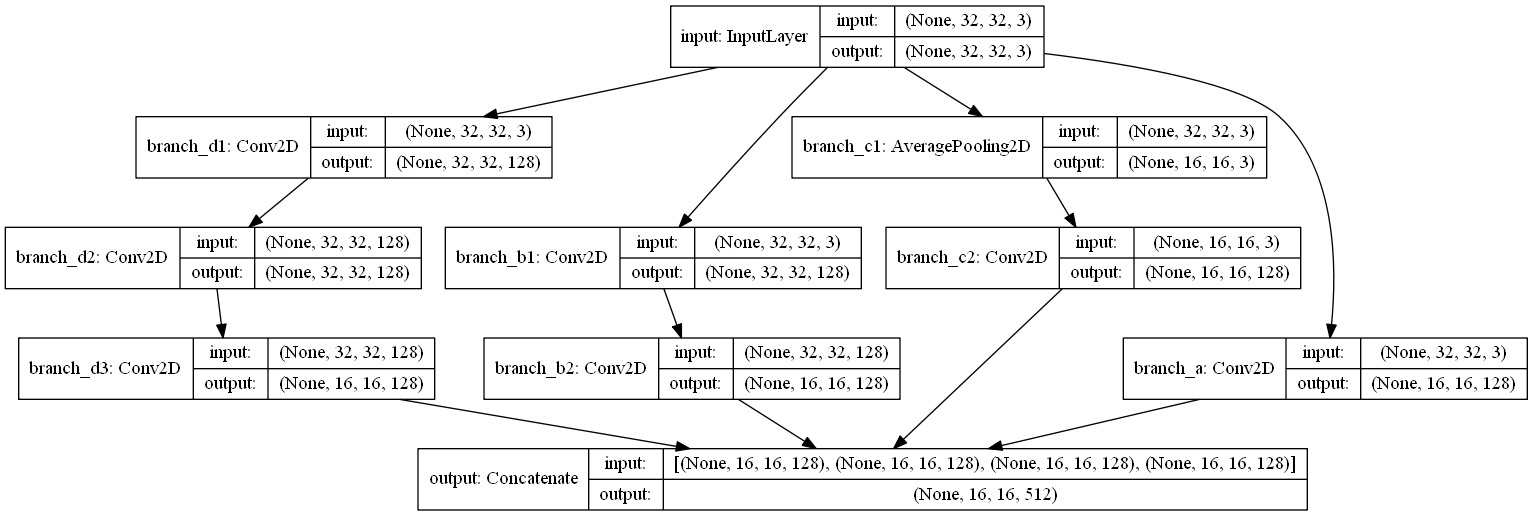

In [8]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model,show_shapes=True,to_file='Inception.png')
Image(filename='Inception.png')

#### InceptionV3参数下载

In [9]:
from keras.applications import InceptionV3

InceptionV3 = InceptionV3(weights='imagenet')
InceptionV3.summary()


96116736/96112376 [==============================] - 138s 1us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_22[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
___________________

In [11]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(InceptionV3,show_shapes=True,to_file='InceptionV3.png')
Image(filename='InceptionV3.png')

In [1]:
from keras.applications import Xception

Xception= Xception(weights='imagenet')
Xception.summary()

Using TensorFlow backend.



91889664/91884032 [==============================] - 144s 2us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________

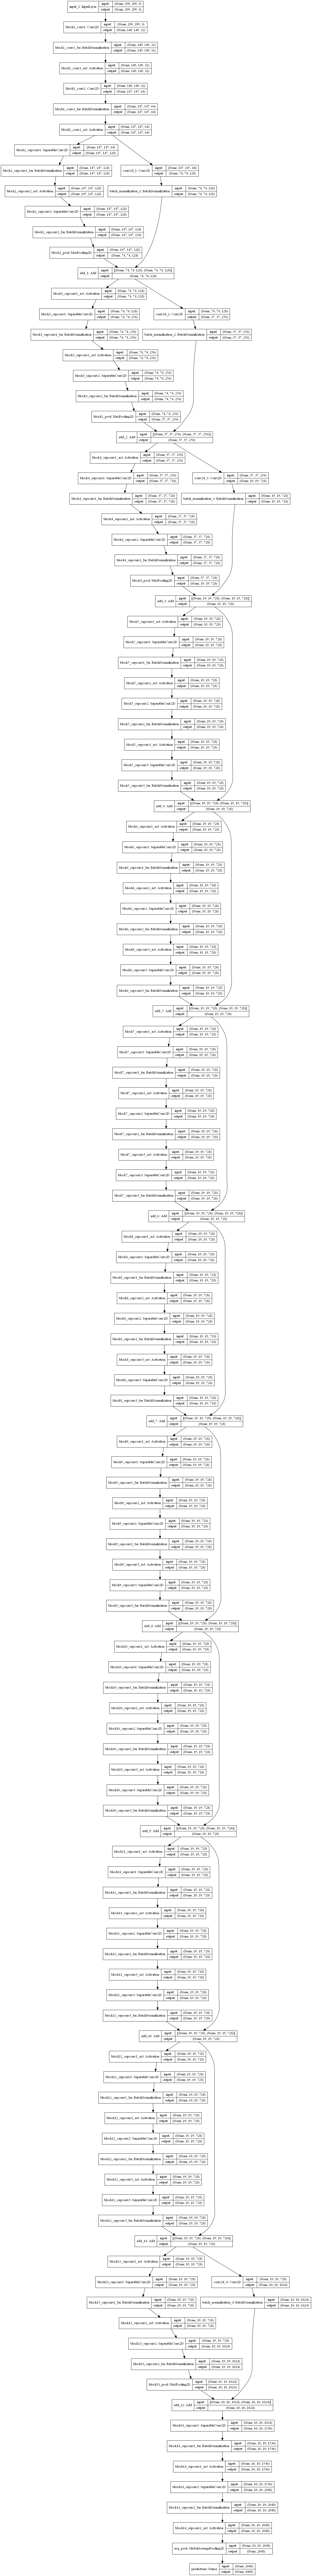

In [2]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(Xception,show_shapes=True,to_file='Xception.png')
Image(filename='Xception.png')

### ResNet -- 残差连接

In [3]:
from keras import layers
from keras import Input
from keras import Model

x = Input(shape=(32,32,3),name='input')
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
z = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
z = layers.Conv2D(128, 3, activation='relu', padding='same')(z)
z = layers.add([z, y])  # 最后一层用y和z点加在一起

model = Model(x,z)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 32, 128)  3584        input[0][0]                      
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 128)  147584      conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 32, 32, 128)  147584      conv2d_6[0][0]                   
____________________________________________________________________________________________

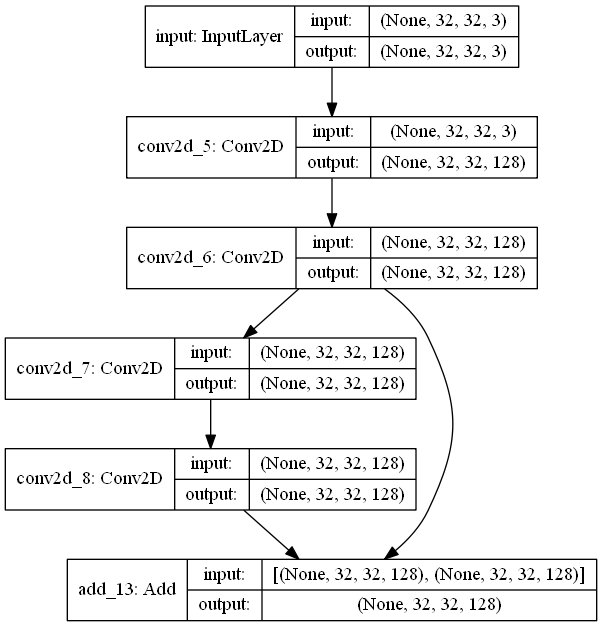

In [5]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model,show_shapes=True,to_file='Resnet.png')
Image(filename='Resnet.png')

In [6]:
from keras import layers
from keras import Input
from keras import Model

x = Input(shape=(32,32,3),name='input')
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.MaxPooling2D(2, strides=2)(y)
residual = layers.Conv2D(128, 1, strides=2, padding='same')(x) 
y = layers.add([y, residual])
model = Model(x,y)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 128)  3584        input[0][0]                      
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 128)  147584      conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 128)  0           conv2d_11[0][0]                  
____________________________________________________________________________________________

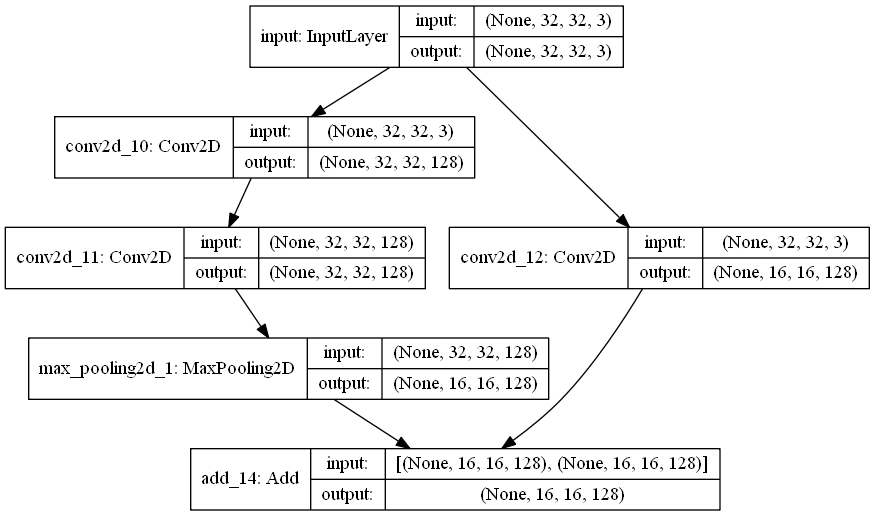

In [7]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model,show_shapes=True,to_file='Resnet2.png')
Image(filename='Resnet2.png')

### ResNet50

## 共享层权重

In [8]:
from keras import layers
from keras import Input
from keras.models import Model

lstm = layers.LSTM(32)

left_input = Input(shape=(None, 128)) 
left_output = lstm(left_input)

right_input = Input(shape=(None, 128)) 
right_output = lstm(right_input)

merged = layers.concatenate([left_output, right_output], axis=-1) 
predictions = layers.Dense(1, activation='sigmoid')(merged)

model = Model([left_input, right_input], predictions) 
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, 128)    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, None, 128)    0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           20608       input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 64)           0           lstm_1[0][0]               

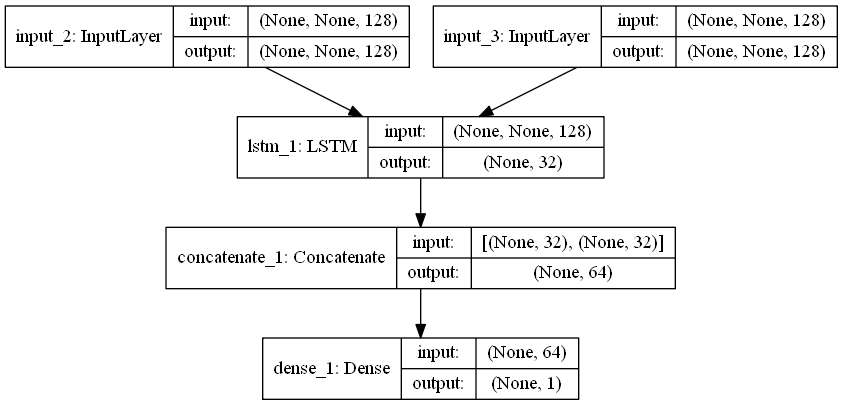

In [10]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model,show_shapes=True,to_file='sharing1.png')
Image(filename='sharing1.png')

## 共享model

In [4]:
from keras import layers
from keras import applications
from keras import Input
from keras import Model

xception_base = applications.Xception(weights=None,include_top=False) 
left_input = Input(shape=(250, 250, 3)) 
right_input = Input(shape=(250, 250, 3))
left_features = xception_base(left_input) 
right_features = xception_base(right_input)
merged_features = layers.concatenate([left_features, right_features], axis=-1)
model = Model([left_input, right_input], merged_features)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 250, 250, 3)  0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 250, 250, 3)  0                                            
__________________________________________________________________________________________________
xception (Model)                multiple             20861480    input_11[0][0]                   
                                                                 input_12[0][0]                   
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 8, 8, 4096)   0           xception[1][0]             

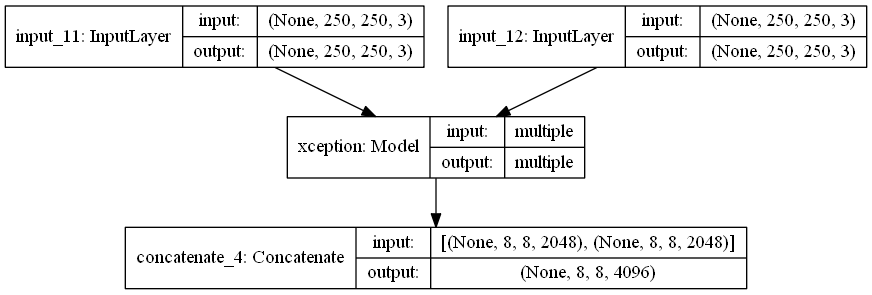

In [5]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model,show_shapes=True,to_file='sharing2.png')
Image(filename='sharing2.png')